# Lending Club Case Study (NAZ and SYED)
## Steps Executed 
### Loading Data and Data Inspection using Pandas (Loan.csv from local)
### Data Distribution using Categorical Vars
### Univariate Analysis using Bar plots,  Pie Charts,Point Plots
### Bivariate analysis using Pairplots, Box plots, Scatter Plots, Area Plots
### Missing Value Visualization
### Correlation Visualization using Heatmaps
####  Analysis is done using these variables:
#### Data Description
###### 
<html><head>
    <B>
        ##### Categorical variables : </B>
        home_owner,sub_grade,grade,loan_status,application_type,verification_status
    <B>  
        ##### Continuous Variables : </B>
<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>
acc_now_delinq ;
acc_open_past_24mths ;
addr_state ;
chargeoff_within_12_mths ;
delinq_2yrs ;
delinq_amnt ;
dti ;
emp_length ;
home_ownership ;
loan_amnt ;
mort_acc ;
mths_since_last_delinq ;
mths_since_last_major_derog ;
mths_since_last_record ;
mths_since_rcnt_il ;
mths_since_recent_bc ;
mths_since_recent_bc_dlq ;
mths_since_recent_inq ;
mths_since_recent_revol_delinq ;
num_accts_ever_120_pd ;
num_actv_bc_tl ; 
num_actv_rev_tl ;
num_bc_sats ;
num_bc_tl ;
num_il_tl ;
num_op_rev_tl ;
num_rev_accts ;
num_rev_tl_bal_gt_0 ;
pub_rec ;
pub_rec_bankruptcies ;
total_acc ;
total_bal_ex_mort ;

</body>
</html>






In [3]:
# Importing the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(" bismillah")

 bismillah


In [5]:
# Downloading data from local and loading data as a data frame
data = pd.read_csv("C:/Users/Public/jupiter/loan.csv")
data.head()

C:\Users\SAMAN ABBAS\AppData\Local\Temp\ipykernel_22652\265127078.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/Public/jupiter/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


###### data processing

In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
data.shape

(39717, 111)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [18]:
data.isnull().sum()
# Convert the dictionary into DataFrame and remove un wanted column from analysis which has 0 or NA value
df = pd.DataFrame(data)
df2 = df.drop(df.loc[:, 'dti_joint':'total_il_high_credit_limit'].columns, axis=1)
df2.shape
df2.info() # full data  set with entire set of  included for all charged off and fully paid and current

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39717 non-null  int64  
 1   member_id                    39717 non-null  int64  
 2   loan_amnt                    39717 non-null  int64  
 3   funded_amnt                  39717 non-null  int64  
 4   funded_amnt_inv              39717 non-null  float64
 5   term                         39717 non-null  object 
 6   int_rate                     39717 non-null  object 
 7   installment                  39717 non-null  float64
 8   grade                        39717 non-null  object 
 9   sub_grade                    39717 non-null  object 
 10  emp_title                    37258 non-null  object 
 11  emp_length                   38642 non-null  object 
 12  home_ownership               39717 non-null  object 
 13  annual_inc      

In [10]:
rslt_df = df2[df2['loan_status'] == "Charged Off"] # filter data for records who are charged_off this phase analysis is done only on that
rslt_df.info()
rslt_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5627 non-null   int64  
 1   member_id                    5627 non-null   int64  
 2   loan_amnt                    5627 non-null   int64  
 3   funded_amnt                  5627 non-null   int64  
 4   funded_amnt_inv              5627 non-null   float64
 5   term                         5627 non-null   object 
 6   int_rate                     5627 non-null   object 
 7   installment                  5627 non-null   float64
 8   grade                        5627 non-null   object 
 9   sub_grade                    5627 non-null   object 
 10  emp_title                    5143 non-null   object 
 11  emp_length                   5399 non-null   object 
 12  home_ownership               5627 non-null   object 
 13  annual_inc       

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,2.0900,Apr-12,152.39,NaN,Aug-12,0.0,NaN,1,INDIVIDUAL,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,2.5200,Nov-12,121.45,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,NaN
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,4.1600,Jul-12,305.38,NaN,Nov-12,0.0,NaN,1,INDIVIDUAL,NaN
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,6.3145,Oct-13,325.74,NaN,Mar-14,0.0,NaN,1,INDIVIDUAL,NaN


In [11]:
# Analysis for Data Distributions using Histograms
categorical = ['home_ownership', 'sub_grade', 'grade', 'loan_status', 'application_type', 'verification_status']
# Frequency for Categorical Variables
for variable in categorical:
    print(rslt_df[variable].value_counts())

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64
B5    356
B3    341
C1    336
B4    329
C2    321
D2    271
C3    270
D3    256
B2    228
A5    217
D4    215
C4    212
D5    209
C5    208
E1    198
A4    178
B1    171
D1    167
E2    163
E4    126
E3    119
E5    109
A3    103
F1     91
A2     74
F2     70
F5     54
F4     53
F3     51
G1     31
A1     30
G2     28
G3     19
G4     13
G5     10
Name: sub_grade, dtype: int64
B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64
Charged Off    5627
Name: loan_status, dtype: int64
INDIVIDUAL    5627
Name: application_type, dtype: int64
Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64


#### Data distrbution using plots for above Categoriccal values

Data Distribution by Ownership


<Axes: ylabel='home_ownership'>

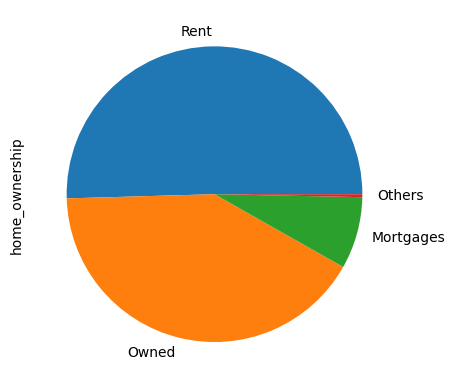

In [23]:
print('Data Distribution by Ownership')

#rslt_df.home_ownership.value_counts(sort=False).plot(kind='bar')
print('=========================================')
rslt_df.home_ownership.value_counts().plot(kind='pie', labels=['Rent', 'Owned' , 'Mortgages' , 'Others'],)


In [61]:
print("Inference : Customers who are on RENT are more likely to default and hence High risk customers")

Inference : Customers who are on RENT are more likely to default and hence High risk customers


Data distribution by Verification status
Inference : Customers who are NOT having proper Verification are more likely to default and hence High risk customers


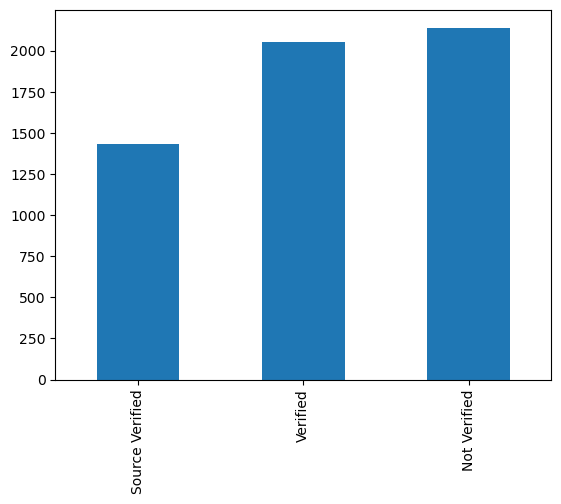

In [12]:
print("Data distribution by Verification status")
print("========================================")
rslt_df.verification_status.value_counts(sort=False).plot(kind='bar')

print("Inference : Customers who are NOT having proper Verification are more likely to default and hence High risk customers")

Data distribution by Grade
Inference : Not much visibility by this data except that B and C grades are more likely to default within defaulters


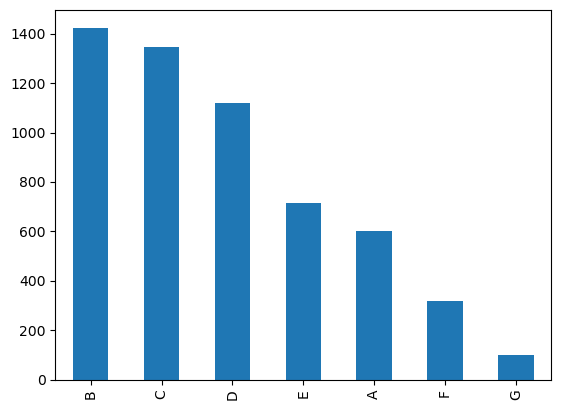

In [13]:

print("Data distribution by Grade")
print("========================================")
rslt_df.grade.value_counts(sort=True).plot(kind='bar')
print("Inference : Not much visibility by this data except that B and C grades are more likely to default within defaulters")

 Thi clearly indicates that Debt consolidation purpose is main category for charge off


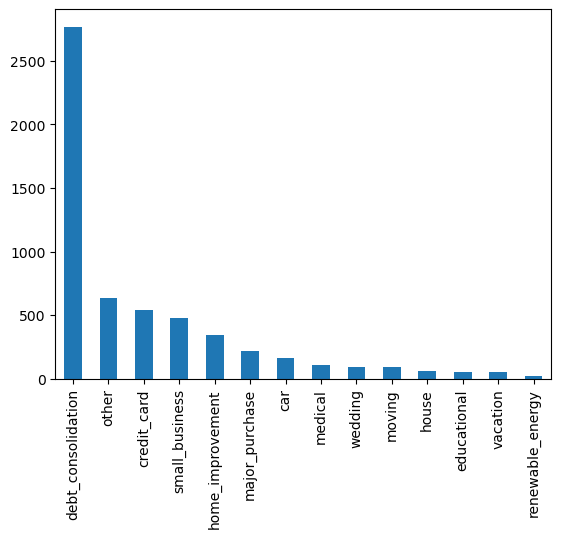

In [22]:
rslt_df.purpose.value_counts(sort=True).plot(kind='bar')
print(" This clearly indicates that Debt consolidation purpose is main category for charge off")

Inference : Maximum charge off are from who are renting and have mortages and taken loan for purpose of debt consolidation


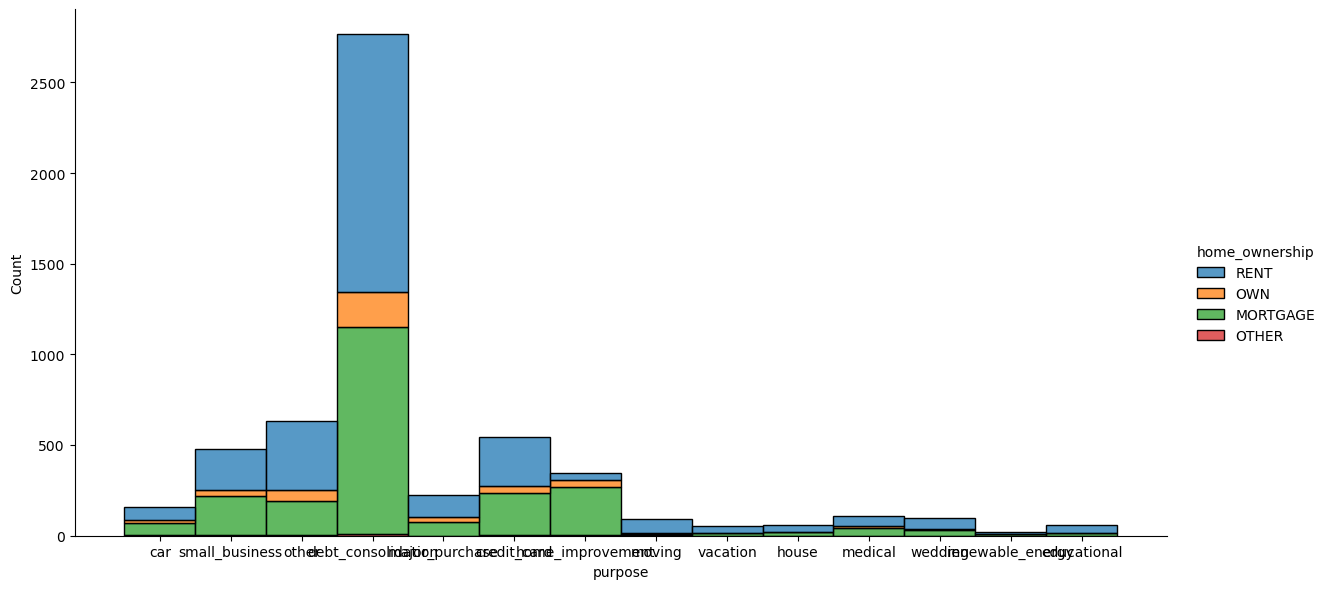

In [34]:
sns.displot(data=rslt_df, x="purpose", hue="home_ownership", multiple="stack",height =6, aspect=2)
print("Inference : Maximum charge off are from who are renting and have mortages and taken loan for purpose of debt consolidation")

Data distribution by Address State
Inference : Maximum charge off are from California that means better checks in CA state and FL or NY


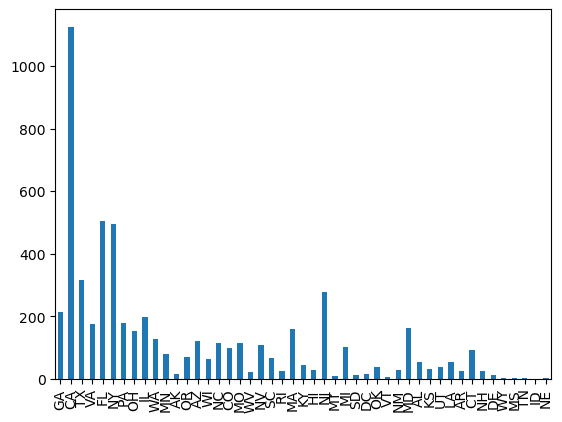

In [14]:
print("Data distribution by Address State")
print("========================================")
rslt_df.addr_state.value_counts(sort=False).plot(kind='bar')
#plt.figure(figsize=(100,10))
print("Inference : Maximum charge off are from California that means better checks in CA state and FL or NY")

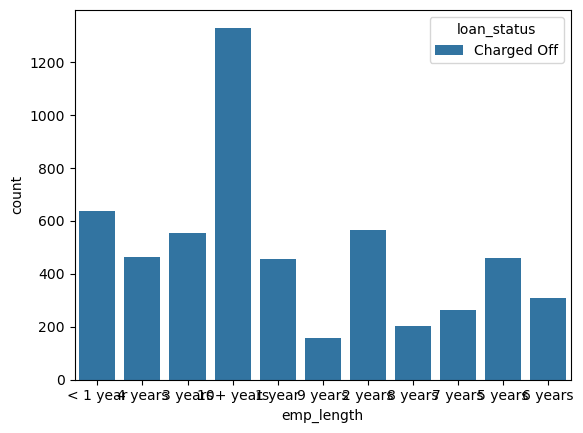

In [62]:
ax = sns.countplot(x="emp_length",data=rslt_df,hue='loan_status') ### only charge off data set 

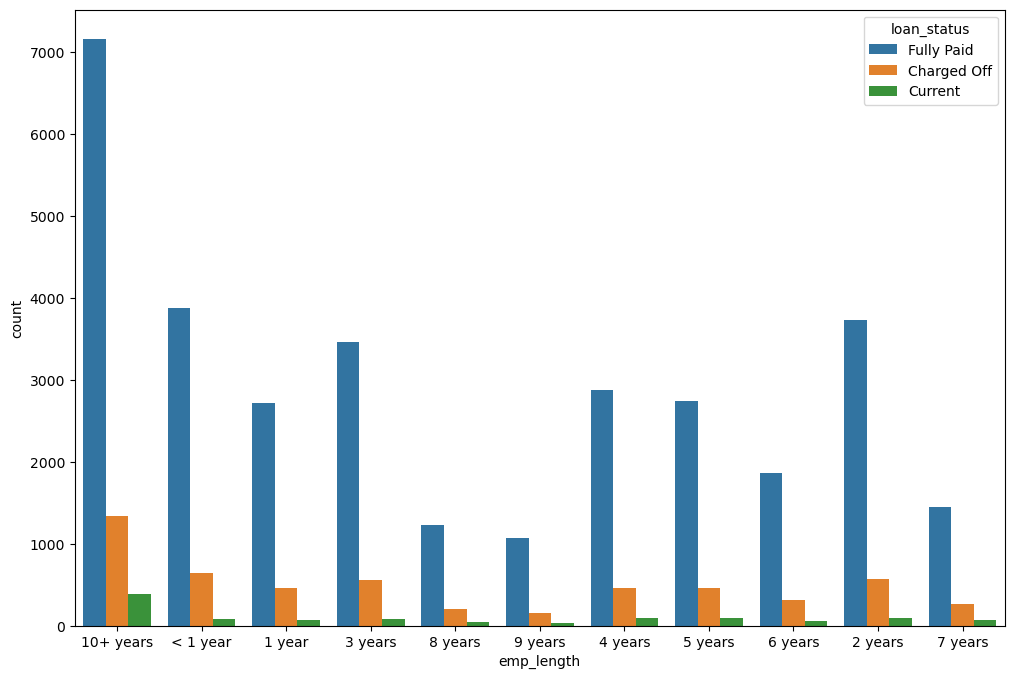

In [77]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1 = sns.countplot(x="emp_length",data=df2,hue='loan_status') ### entire data set 

print("Ability to pay loan is directly proportiaonl to nummber of year of service as we can see here more the experiece more he is likely to re pay the loan")

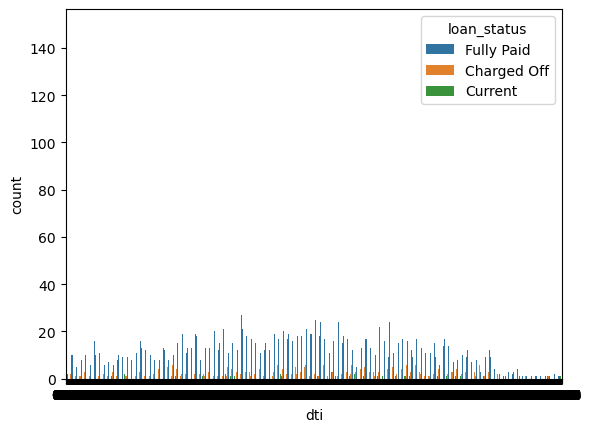

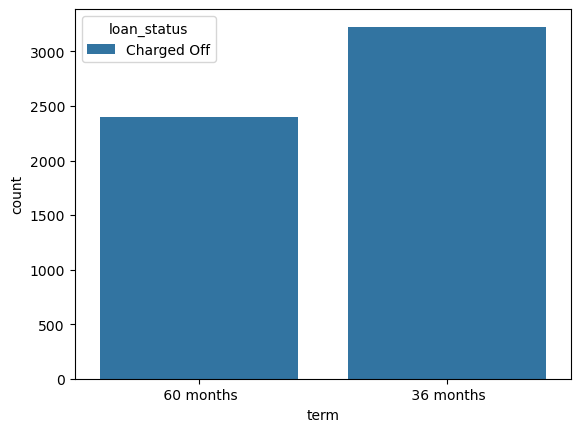

In [17]:
ax = sns.countplot(x="term",data=rslt_df,hue='loan_status')
#sns.displot(data=rslt_df, x="addr_state", hue="verification_status", multiple="stack",height=6, aspect=2)rslt_df
print(" this shows that candidates with less term are more defaulters ")

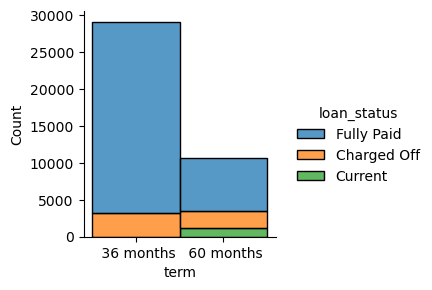

In [20]:
sns.displot(data=df2, x="term", hue="loan_status", multiple="stack",height =3, aspect=1)

Inference : Below show that loan amount < 10 K with rent or mortgages have highest defaulters this needs further analysis  


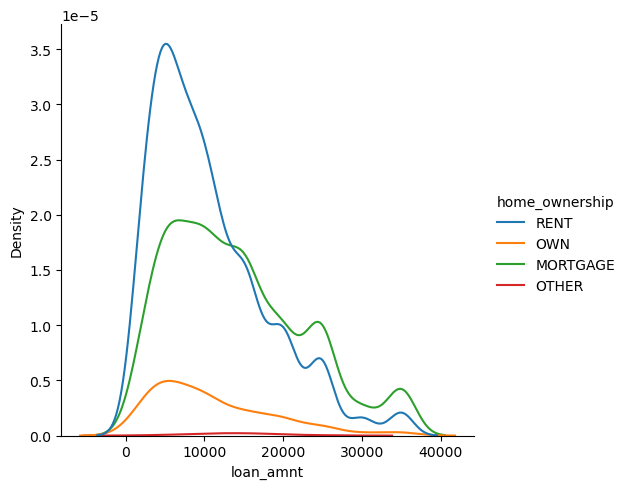

In [78]:
sns.displot(data=rslt_df, x="loan_amnt", hue = "home_ownership", kind="kde")
print("Inference : Below show that loan amount < 10 K with rent or mortgages have highest defaulters this needs further analysis  ")


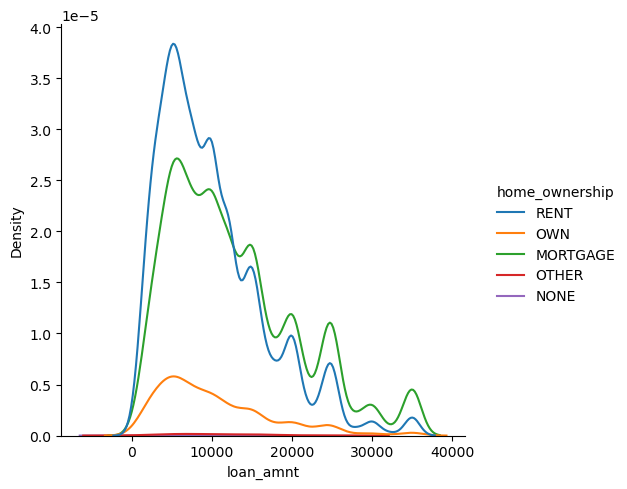

In [79]:
sns.displot(data=df2, x="loan_amnt", hue = "home_ownership", kind="kde")
## even if u do this on entire data set this does not change the result

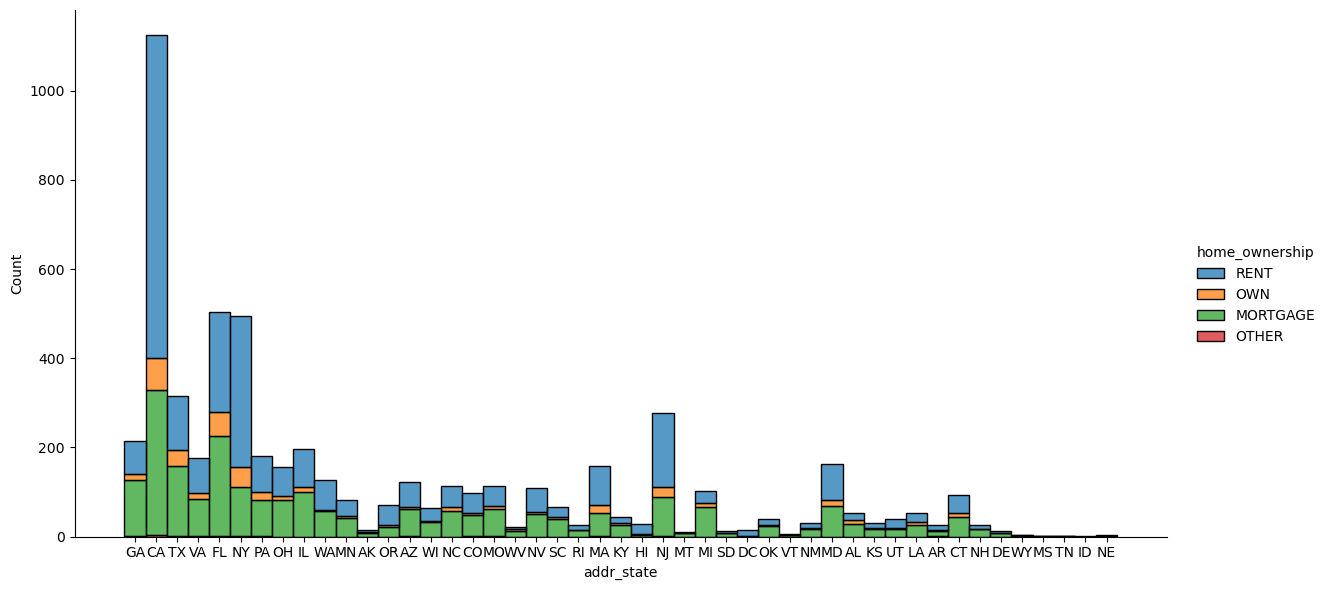

In [81]:
sns.displot(data=rslt_df, x="addr_state", hue="home_ownership", multiple="stack",height=6, aspect=2)

Inference : Above 2 graphs show that Rented owners and with non verifiede status are likely to charge off  


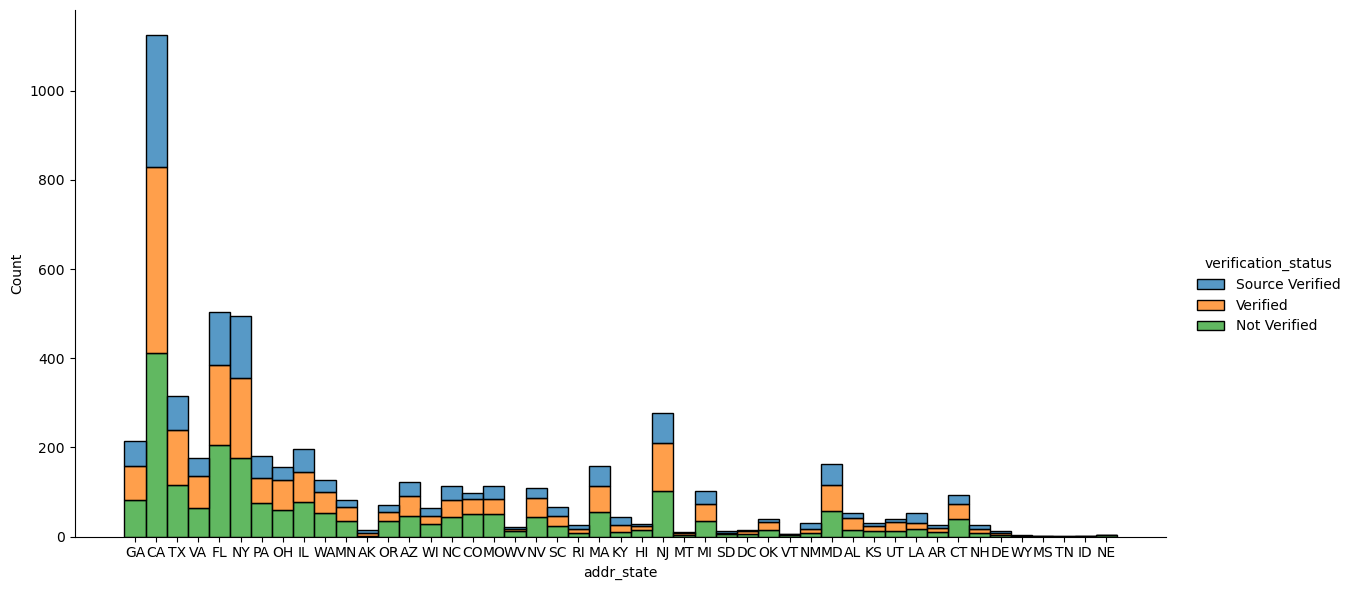

In [84]:
sns.displot(data=rslt_df, x="addr_state", hue="verification_status", multiple="stack",height=6, aspect=2)
print("Inference : Above 2 graphs show that Rented owners and with non verified status are likely to charge off and is prominent in CA  ")

###### Bi variate analysis (on the filtered data only charged off data) various parameters that are considered for the same are 
###### Emp Grade vs charged off , Emp Income pattern in charged off , Purpose Vs Charged Off position , Interest pattern on charged off , Emp length on Charged Off , purpose vs Interst rate 

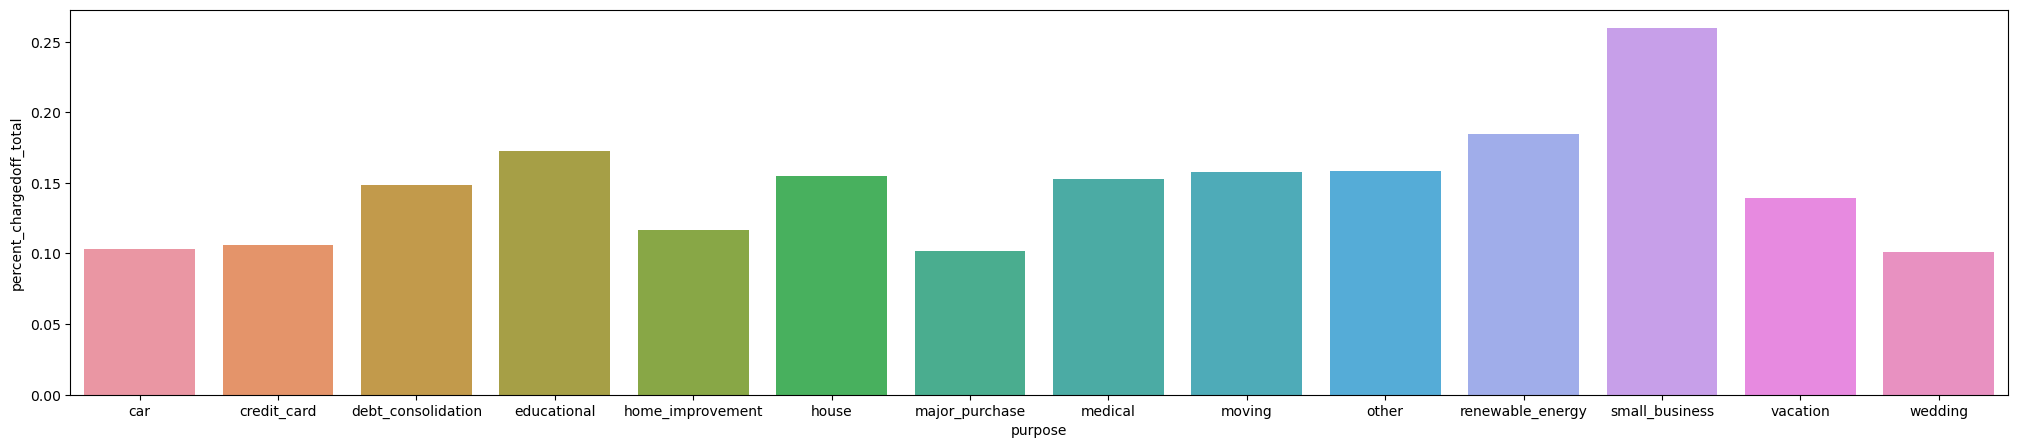

In [86]:
# we need to Group by data on basis of purpose and loan status annual and how it behaves in across entire data 
#note we are taking Non filtered data frame now 

bi_var_purpose_and_loan_sts = df2.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

bi_var_purpose_and_loan_sts['chargedoff_total'] = bi_var_purpose_and_loan_sts['Charged Off']+bi_var_purpose_and_loan_sts['Current']+ bi_var_purpose_and_loan_sts['Fully Paid']
bi_var_purpose_and_loan_sts['percent_chargedoff_total']=bi_var_purpose_and_loan_sts['Charged Off'] / bi_var_purpose_and_loan_sts['chargedoff_total']                                                           
#print(bi_var_purpose_and_loan_sts)
fig, ax1 = plt.subplots(figsize=(25, 5))
ax1=sns.barplot(x='purpose', y='percent_chargedoff_total', data=bi_var_purpose_and_loan_sts)

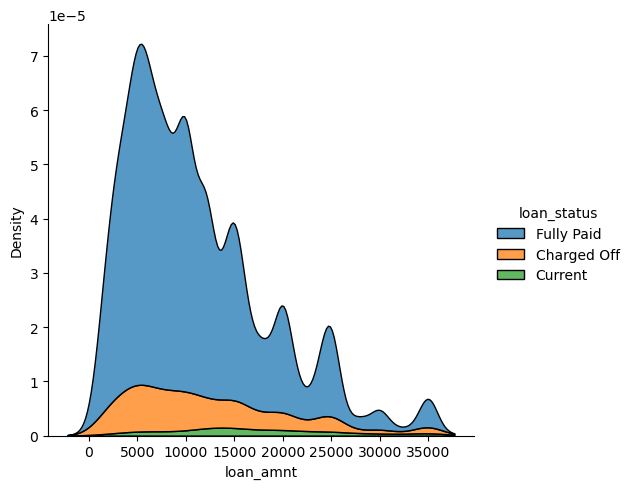

In [59]:
sns.displot(data=df2, x="loan_amnt", hue = "loan_status", kind="kde" ,  multiple="stack")


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

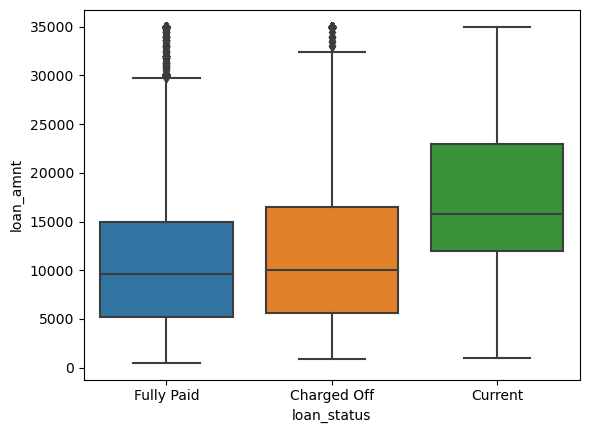

In [65]:
sns.boxplot(data=df2, x="loan_status", y="loan_amnt")


<Axes: xlabel='loan_status', ylabel='dti'>

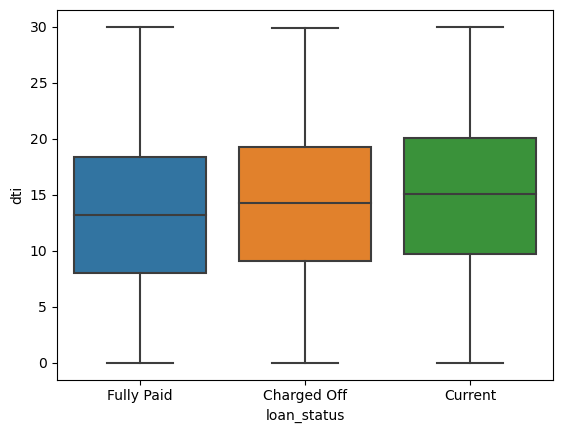

In [89]:
sns.boxplot(data=df2, x="loan_status", y="dti")
print("Inference for DTI vs loan status gives that  charge off have higher median than fully paid")

<Axes: xlabel='grade', ylabel='dti'>

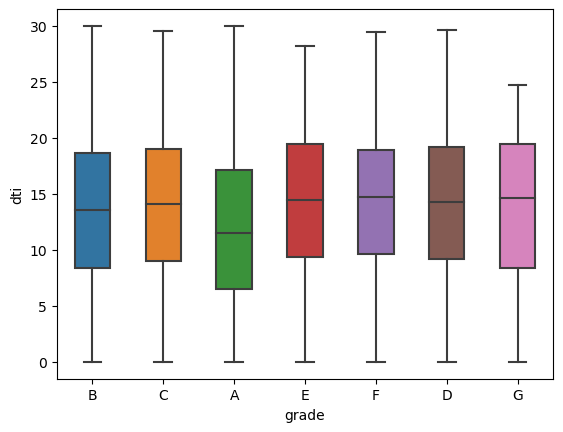

In [97]:
#bi_var_grade_and_dti = df2.groupby(['grade', 'dti']).grade.count().unstack().fillna(0).reset_index()
#print(bi_var_grade_and_dti)
#sns.countplot(bi_var_grade_and_dti, x="grade" , stat="percent")sns.boxplot(data=df2, y="purpose", x="installment",width=.5)
sns.boxplot(data=df2, y="dti", x="grade",width=.5)

Installments for credit card , debt consolidation , small_business and house are more with regards to others


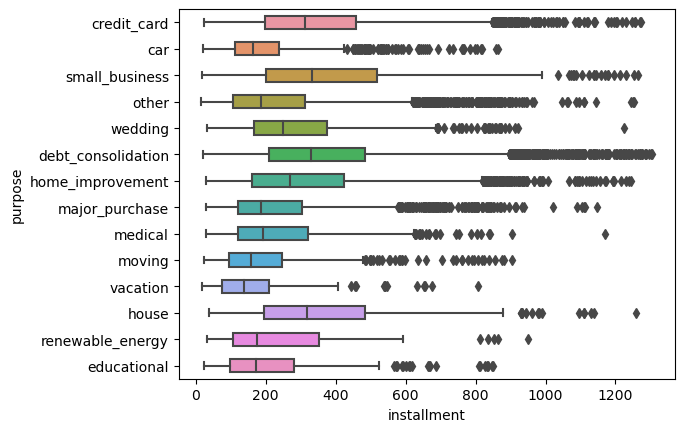

In [87]:


sns.boxplot(data=df2, y="purpose", x="installment",width=.5)
print("Installments for credit card , debt consolidation , small_business and house are more with regards to others")

<Axes: xlabel='loan_amnt', ylabel='annual_inc'>

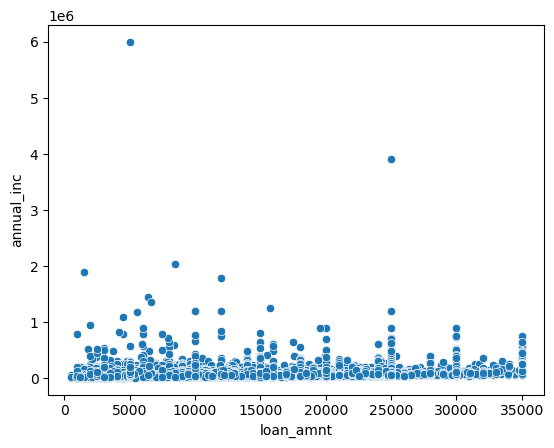

In [71]:
#sns.boxplot(data=df2, x="loan_amnt", y="annual_inc")
sns.scatterplot(data=df2, x="loan_amnt", y="annual_inc") ## not much inference except that there are outliers whihc we need to remove 

In [ ]:
#sns.boxplot(data=df2, x="loan_status", y="emp_length") -- gsve error that emp len is not numeric
# will have to derive column emp len in numerc to do any analysis 
